<a href="https://colab.research.google.com/github/egonloch/DNC/blob/main/Desafio_6_Egon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [500]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

**Target**: Churned

Variáveis do problema

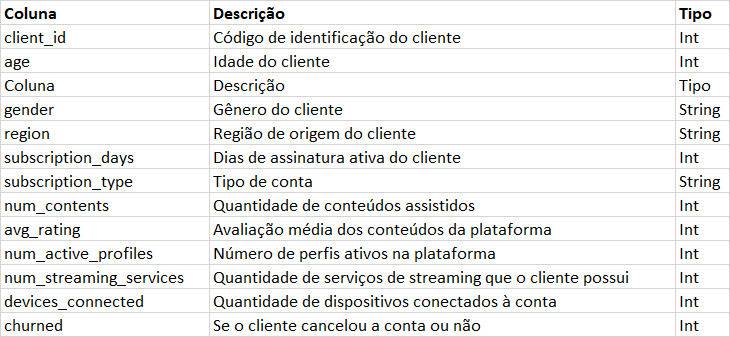

In [501]:
#upload do arquivo
churn = pd.read_csv("/content/streaming_data.csv")
#apresentação dos dados
churn.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


# Data Understanding

In [502]:
#descrição dos dados
churn.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [503]:
#procurar valores nulos nos dados
valores_nulos_totais = churn.isnull().sum()
print("Valores nulos totais no DataFrame:")
print(valores_nulos_totais)

Valores nulos totais no DataFrame:
Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


In [504]:
#Substituir valores “NaN” por 0 Colunas → Time_on_platform,
#Num_streaming_services, Churned, Avg_rating, Devices_connected
churn['Time_on_platform'].fillna(0, inplace=True)
churn['Devices_connected'].fillna(0, inplace=True)
churn['Avg_rating'].fillna(0, inplace=True)
churn['Churned'].fillna(0, inplace=True)
churn['Num_streaming_services'].fillna(0, inplace=True)

In [505]:
#Dropar linhas nulas nas colunas Gender, Subscription_type e Age
churn.dropna(subset=['Age', 'Gender', 'Subscription_type'], inplace=True)

In [506]:
#verificando a existencia ainda de valores nulos
valores_nulos_totais = churn.isnull().sum()
print("Valores nulos totais no DataFrame:")
print(valores_nulos_totais)

Valores nulos totais no DataFrame:
Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64


In [507]:
#Informações dos dados
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
 9   User_id                 36515 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [508]:
#Transformando valores floats em valores inteiros
churn['Age'] = churn['Age'].astype(int)
churn['Devices_connected'] = churn['Devices_connected'].astype(int)
churn['Num_active_profiles'] = churn['Num_active_profiles'].astype(int)
churn['Avg_rating'] = churn['Avg_rating'].astype(int)
churn['Time_on_platform'] = churn['Time_on_platform'].astype(int)

In [509]:
# Transformando valores churned 0 e 1 por No e Yes
churn['Churned'] = churn['Churned'].map({0: 'Não', 1: 'Sim'})

In [510]:
#Número de usarios churned
churn_agg = churn.groupby("Churned")['User_id'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Churned,User_id
0,Não,29459
1,Sim,7056


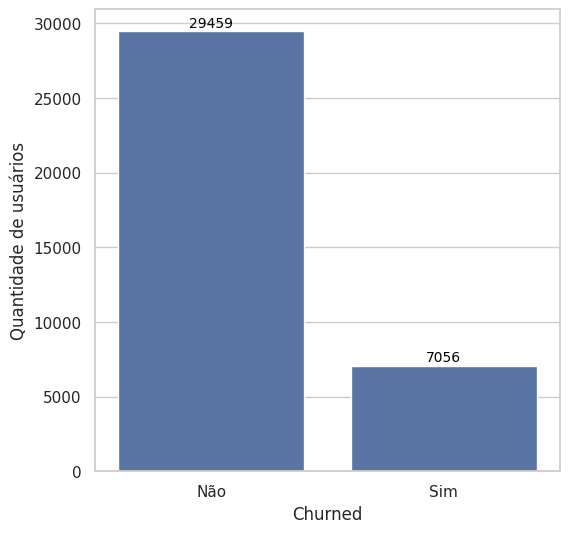

In [511]:
#Grafico de usarios churned
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

ax = sns.barplot(data=churn_agg, x="Churned", y="User_id")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')

plt.xlabel("Churned")
plt.ylabel("Quantidade de usuários")

plt.show()

In [512]:
#Classificação por tipo assinatura
churn_agg = churn.groupby("Subscription_type")['User_id'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Subscription_type,User_id
0,Basic,12134
1,Premium,12224
2,Standard,12157


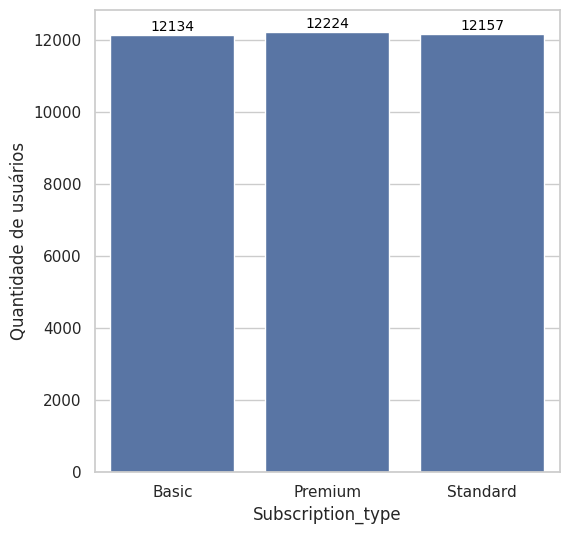

In [513]:
#Grafico por tipo de assinatura
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

ax = sns.barplot(data=churn_agg, x="Subscription_type", y="User_id")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')

plt.xlabel("Subscription_type")
plt.ylabel("Quantidade de usuários")

plt.show()

In [514]:
#Classificaçao por assinatura
churn_agg_gender = churn.groupby("Gender")['User_id'].count().reset_index()
churn_agg_gender = pd.DataFrame(churn_agg_gender)
churn_agg_gender

,Gender,User_id
0,Female,18149
1,Male,18366


# Preparação para modelagens

In [515]:
churn.dtypes

Age                         int64
Gender                     object
Time_on_platform            int64
Devices_connected           int64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                  int64
Churned                    object
User_id                    object
dtype: object

In [516]:
X = churn.drop(['User_id', 'Churned'], axis=1)

y = churn[['Churned']]

In [517]:
le = LabelEncoder()

le.fit(y.Churned)
y['Churned'] = le.transform(y['Churned'])

<ipython-input-517-7898a94e72ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churned'] = le.transform(y['Churned'])


In [518]:
X = pd.get_dummies(X)

In [519]:
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [520]:
# Aplicar oversampling aos dados de treinamento
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Dividir os dados resampleados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Regressão Logística

In [521]:
#modelo com classes balanceadas

model = LogisticRegression(class_weight='balanced')
lr = model.fit(X_train, y_train)

In [522]:
lr.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [523]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
12456,0.607843,0.000000,0.0,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1,0
10557,0.294118,0.466492,0.0,0.50,1.00,0.6,1.0,0.0,0.0,1.0,0.0,1,1
10042,0.705882,0.779084,0.6,0.00,0.00,0.8,0.0,1.0,1.0,0.0,0.0,0,1
7810,0.568627,0.799520,1.0,1.00,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,1
4864,0.568627,0.934467,0.4,0.00,0.50,0.8,1.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,0.941176,0.217034,0.2,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1624,0.803922,0.466492,0.0,0.00,0.75,0.4,1.0,0.0,0.0,1.0,0.0,0,0
5851,0.019608,0.967919,0.8,1.00,0.00,0.2,1.0,0.0,0.0,0.0,1.0,1,0
9030,0.274510,0.211440,1.0,0.00,1.00,0.6,1.0,0.0,0.0,1.0,0.0,0,0


--------------------Previsão-----------------



Text(0.5, 1.0, 'Projetado')

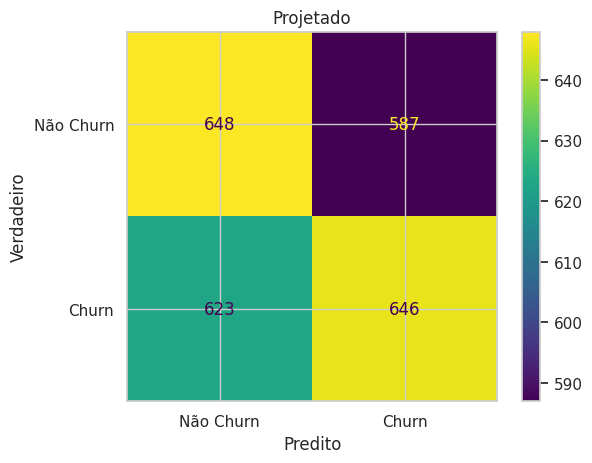

In [524]:
print('--------------------Previsão-----------------\n')
y_pred = lr.predict(X_test)

#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

In [525]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.5125848981222533
Acurácia (Teste): 0.5167731629392971
Acurácia Balanceada (Treino): 0.5125887743399804
Acurácia Balanceada (Teste): 0.5168793050092042
Precision (Treino): 0.5108630655770381
Precision (Teste): 0.5239253852392538
Recall (Treino): 0.5137302064541992
Recall (Teste): 0.5090622537431048
F1-Score (Treino): 0.5122926244253447
F1-Score (Teste): 0.51638689048761
ROCAUC (Treino): 0.5154870478141698
ROCAUC (Teste): 0.5149724192277384


# Random Forest


In [526]:
rf = RandomForestClassifier(random_state=42)

In [527]:
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [528]:
rf.predict(X_test)

array([1, 1, 0, ..., 1, 0, 0])

In [529]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
12456,0.607843,0.000000,0.0,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1,1
10557,0.294118,0.466492,0.0,0.50,1.00,0.6,1.0,0.0,0.0,1.0,0.0,1,1
10042,0.705882,0.779084,0.6,0.00,0.00,0.8,0.0,1.0,1.0,0.0,0.0,0,0
7810,0.568627,0.799520,1.0,1.00,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
4864,0.568627,0.934467,0.4,0.00,0.50,0.8,1.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,0.941176,0.217034,0.2,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1624,0.803922,0.466492,0.0,0.00,0.75,0.4,1.0,0.0,0.0,1.0,0.0,0,0
5851,0.019608,0.967919,0.8,1.00,0.00,0.2,1.0,0.0,0.0,0.0,1.0,1,1
9030,0.274510,0.211440,1.0,0.00,1.00,0.6,1.0,0.0,0.0,1.0,0.0,0,0


--------------------Previsão-----------------



Text(0.5, 1.0, 'Projetado')

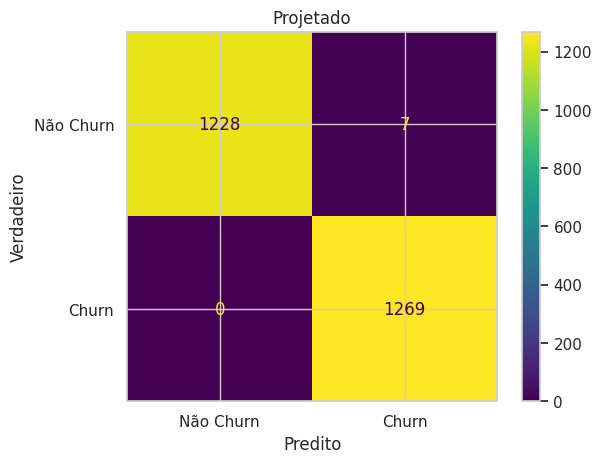

In [530]:
print('--------------------Previsão-----------------\n')
y_pred = rf.predict(X_test)

#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

In [531]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9971034758290052
Acurácia (Teste): 0.9972044728434505
Acurácia Balanceada (Treino): 0.9971044599931516
Acurácia Balanceada (Teste): 0.997165991902834
Precision (Treino): 0.9967948717948718
Precision (Teste): 0.9945141065830722
Recall (Treino): 0.9973942673882542
Recall (Teste): 1.0
F1-Score (Treino): 0.9970944795110711
F1-Score (Teste): 0.9972495088408644
ROCAUC (Treino): 0.9998194315369584
ROCAUC (Teste): 0.9997986874806584


# Tunning

In [542]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
              'n_estimators': [100, 300, 500]}


grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)


In [543]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [544]:
dict = grid_search.best_estimator_.get_params()

In [545]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [546]:
#mudei para balanced pq os valores não estavam muito precisos

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 20, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 500, n_jobs = None,
                                     oob_score = False, random_state = 42,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [547]:
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=42)

In [548]:
rf_tunned.predict(X_test)

array([1, 1, 0, ..., 1, 1, 0])

In [549]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
12456,0.607843,0.000000,0.0,0.00,1.00,0.0,1.0,0.0,0.0,1.0,0.0,1,1
10557,0.294118,0.466492,0.0,0.50,1.00,0.6,1.0,0.0,0.0,1.0,0.0,1,1
10042,0.705882,0.779084,0.6,0.00,0.00,0.8,0.0,1.0,1.0,0.0,0.0,0,0
7810,0.568627,0.799520,1.0,1.00,0.75,0.6,0.0,1.0,0.0,0.0,1.0,0,0
4864,0.568627,0.934467,0.4,0.00,0.50,0.8,1.0,0.0,0.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,0.941176,0.217034,0.2,0.00,0.00,0.0,1.0,0.0,1.0,0.0,0.0,0,0
1624,0.803922,0.466492,0.0,0.00,0.75,0.4,1.0,0.0,0.0,1.0,0.0,0,1
5851,0.019608,0.967919,0.8,1.00,0.00,0.2,1.0,0.0,0.0,0.0,1.0,1,1
9030,0.274510,0.211440,1.0,0.00,1.00,0.6,1.0,0.0,0.0,1.0,0.0,0,1


--------------------Previsão-----------------



Text(0.5, 1.0, 'Projetado')

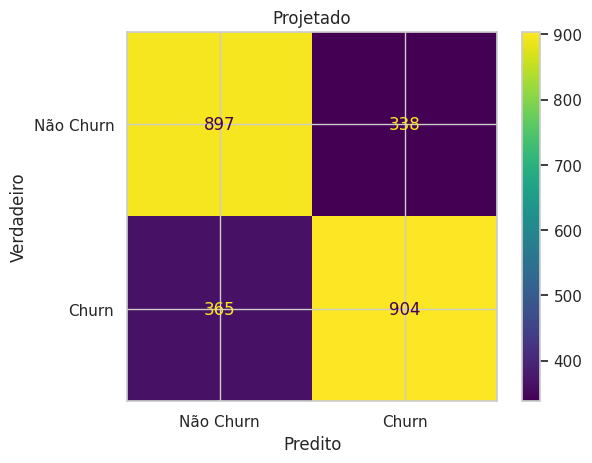

In [550]:
print('--------------------Previsão-----------------\n')
y_pred = rf_tunned.predict(X_test)

#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

In [551]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9975029964043148
Acurácia (Teste): 0.7192492012779552
Acurácia Balanceada (Treino): 0.9975060203121764
Acurácia Balanceada (Teste): 0.719343867944092
Precision (Treino): 0.9965986394557823
Precision (Teste): 0.7278582930756844
Recall (Treino): 0.9983964722389257
Recall (Teste): 0.7123719464144996
F1-Score (Treino): 0.9974967457695004
F1-Score (Teste): 0.7200318598168061
ROCAUC (Treino): 0.9998689531861594
ROCAUC (Teste): 0.8004109200077845
